# Using excel to build a model

In some cases in which the number of users or appliances are high, it can be difficult to create a model using python scripts. In RAMP, there is the possibility to create inputs using excel. In this example we show a use case of this functionality.


In [1]:
from ramp import User, Appliance, UseCase
from ramp import calc_peak_time_range,yearly_pattern
import pandas as pd

At the first step, user needs to creat User classes and assign Appliances to the user class without assiging detaild appliance characteristics

### Buidling a model database

In [2]:
# Defining a dict of users with their appliances

user_app = {
    "household" : ["light","tv"],
    "school": ["light","computer"]
}

In [3]:
# creating a UseCase class to create the database
use_case = UseCase()

In [4]:
# assinging the appliances to users
for user,apps in user_app.items():
    
    user_instance = User(user_name = user)
    
    for app in apps:
        app_instance = user_instance.add_appliance(name=app)
        app_instance.windows()
        
    use_case.add_user(user_instance)

/Users/mohammadamintahavori/Documents/GitHub/RAMP/ramp/core/core.py:738: UserWarning: No windows is declared, default window of 24 hours is selected
  warnings.warn(UserWarning("No windows is declared, default window of 24 hours is selected"))


Once the users and appliacnes are added to the use_case instance, the user can get a pd.DataFrame or an excel file of all the data with the default values:

### Exporting the database

In [5]:
# getting the dataframe
use_case.export_to_dataframe()

,user_name,num_users,user_preference,name,number,power,num_windows,func_time,time_fraction_random_variability,func_cycle,...,cw32_start,cw32_end,r_c3,window_1_start,window_1_end,window_2_start,window_2_end,window_3_start,window_3_end,random_var_w
0,household,1,0,light,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0
1,household,1,0,tv,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0
2,school,1,0,light,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0
3,school,1,0,computer,1,0.0,1,0,0,1,...,0,0,0,0,1440,0,0,0,0,0


In [6]:
# Printing out the database to an excel file
use_case.save("path/name_of_file")

Once the function is used, an excel file will be created in the given path:

![excel file image](excel_file.png)


Now the user can easily fill-out the information in the excel file and load the data into the model database as follow: 

### Loading the database

In [7]:
# loading data

use_case = UseCase() # creating a new UseCase instance
use_case.load("path/name_of_file.xlsx")

### Generating load profiles

Once the database is loaded, the user can continue with the normal analysis like generating aggregated profiles

In [8]:
peak_time_range = calc_peak_time_range(
    user_list = use_case.users
)

year_behaviour = yearly_pattern()

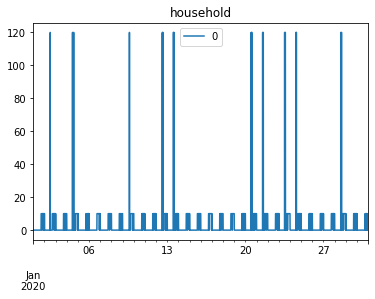

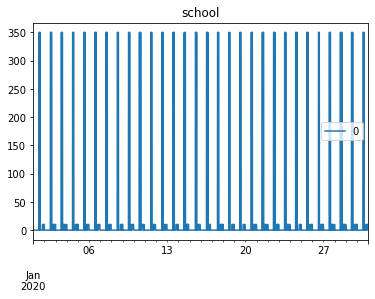

In [9]:
n_days = 30



for user in use_case.users:
    user_profiles = []
    for day in range(n_days):
        profile = user.generate_aggregated_load_profile(
                        prof_i = day,
                        peak_time_range = peak_time_range,
                        Year_behaviour = year_behaviour
                    )
        
        user_profiles.extend(profile)
        
    profiles = pd.DataFrame(   
        data = user_profiles,
        index = pd.date_range(start = "2020-01-01",periods = 1440*n_days,freq="T"),
    )
    
    profiles.plot(title = user.user_name)
    
        